# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,449,91,39,82,164,68,10,143,46,19,137,164,308,158,68,13,9,191,201
1,267,100,46,81,187,61,9,166,40,20,154,189,415,175,63,13,9,198,207
2,164,98,54,104,186,59,10,213,32,24,172,223,665,217,73,1,26,186,195
3,802,89,44,80,191,66,6,162,40,20,143,189,396,180,66,13,11,194,199
4,574,104,55,105,216,68,11,205,32,23,169,221,623,216,71,9,18,189,196
5,360,108,52,109,182,55,12,216,31,24,171,229,687,214,72,10,28,189,201
6,142,106,49,107,194,57,11,214,31,24,161,224,670,172,67,0,39,192,206
7,237,85,45,65,128,56,8,151,45,19,145,170,332,186,81,1,10,179,184
8,73,73,37,53,111,54,6,126,55,18,128,135,227,147,82,1,15,176,184
9,37,90,48,86,306,126,49,153,44,19,156,272,346,200,118,0,15,185,194


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,409.608379,93.826958,44.914390,82.531876,169.007286,61.508197,8.520947,169.313297,40.775956,20.606557,148.096539,189.027322,442.302368,175.244080,72.273224,6.387978,12.557377,189.089253,195.761384
std,243.933351,8.149220,6.146475,15.566709,32.398747,7.348620,4.205707,33.207051,7.699588,2.597380,14.336919,31.054655,177.263618,32.775706,7.198821,4.884125,8.879099,6.125903,7.473279
min,0.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,197.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,150.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,397.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,612.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,199.000000,46.000000,23.000000,159.000000,217.000000,597.000000,198.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,306.000000,126.000000,55.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
### YOUR CODE HERE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [6]:
#Загрузка данных
df = pd.read_csv('car_data.csv')

#просматриваю первые 10 строк 
df.head(10)

,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
0,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
1,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
2,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
3,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
4,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
5,6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
6,7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
7,8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
8,9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab
9,10,86,36,70,143,61,9,133,50,18,130,153,266,127,66,2,10,194,202,van


In [7]:
#посмотрим какие марки машин и их колличество есть
pd.DataFrame(y_train).value_counts()

bus     145
opel    137
saab    136
van     131
Name: count, dtype: int64

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
df = pd.read_csv('car_data.csv')

# ищем категориальные признаки
categorical_cols = ['van']

# закодируем их
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[categorical_cols])
encoded_categorical = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out())

# объединение закодированных категориальных признаков с исходным
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_categorical], axis=1)

print(df_encoded.head())

   0   95  48   83  178   72  10  162  42  20  ...  184   70   6  16  187  \
0  1   91  41   84  141   57   9  149  45  19  ...  158   72   9  14  189   
1  2  104  50  106  209   66  10  207  32  23  ...  220   73  14   9  188   
2  3   93  41   82  159   63   9  144  46  19  ...  127   63   6  10  199   
3  4   85  44   70  205  103  52  149  45  19  ...  188  127   9  11  180   
4  5  107  57  106  172   50   6  255  26  28  ...  264   85   5   9  181   

   197  van_bus  van_opel  van_saab  van_van  
0  199      0.0       0.0       0.0      1.0  
1  196      0.0       0.0       1.0      0.0  
2  207      0.0       0.0       0.0      1.0  
3  183      1.0       0.0       0.0      0.0  
4  183      1.0       0.0       0.0      0.0  

[5 rows x 23 columns]


<Axes: >

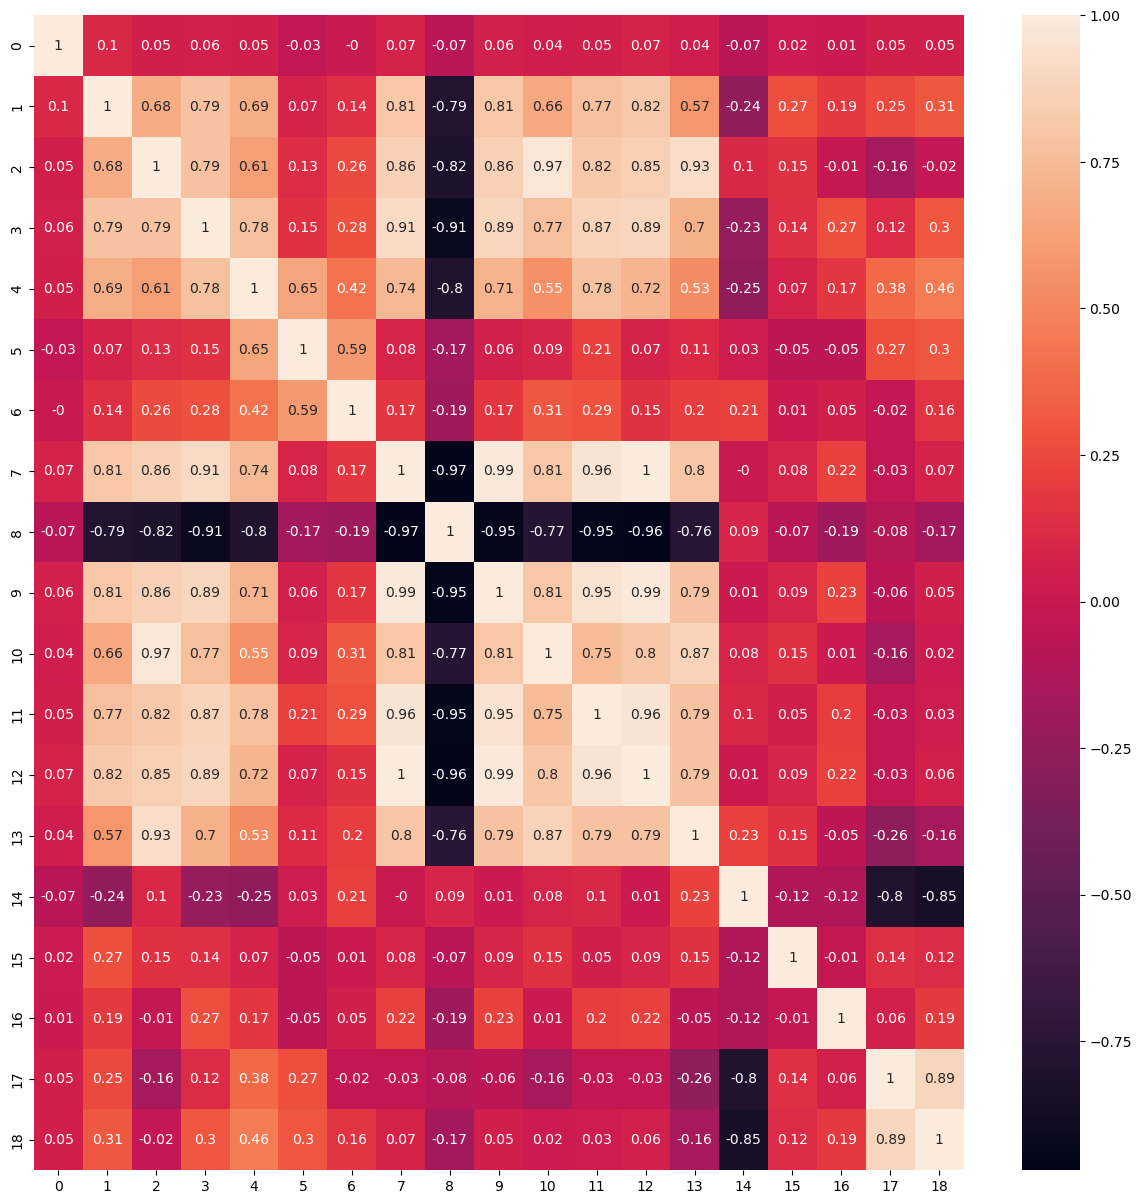

In [9]:
#построим матрицу корреляций, чтобы выявить высокоскорелированные признаки

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train_pd.corr().round(2)

plt.figure(figsize=(15, 15))

sns.heatmap(data=correlation_matrix, annot=True)

In [23]:
### YOUR CODE HERE

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


data_pipeline = Pipeline([
    ('correlated_features', RemoveCorrelatedFeatures()),
    ('scaler', StandardScaler()), 
])


label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [24]:
### YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(y_test, y_pred_proba):

    y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
    n_classes = y_test_binarized.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='Class %i (area = %0.2f)' % (i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC curve')
    plt.legend(loc="lower right")
    plt.show()

def print_metrics(y_test, y_pred):
    
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_log

Best hyperparameters: {'log_reg__C': 100}
Accuracy: 0.7575757575757576
F1 Score: 0.7529202322761099


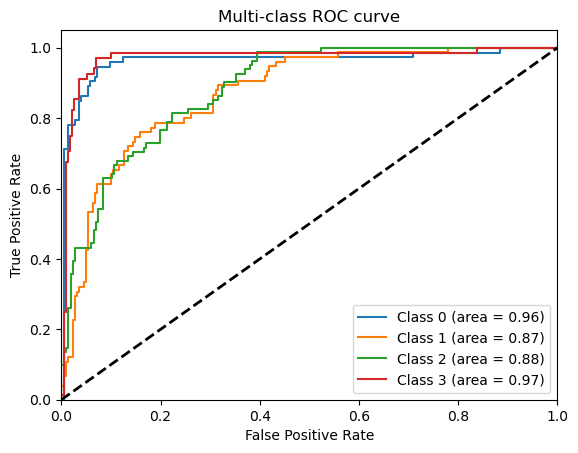

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

log_reg_pipeline = Pipeline([
    ('preprocessing', data_pipeline),
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))
])

param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100, 1000]  # Regularization strength
}

grid_search = GridSearchCV(log_reg_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)

print_metrics(y_test, y_pred)

plot_multiclass_roc(y_test, y_pred_proba)

In [40]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

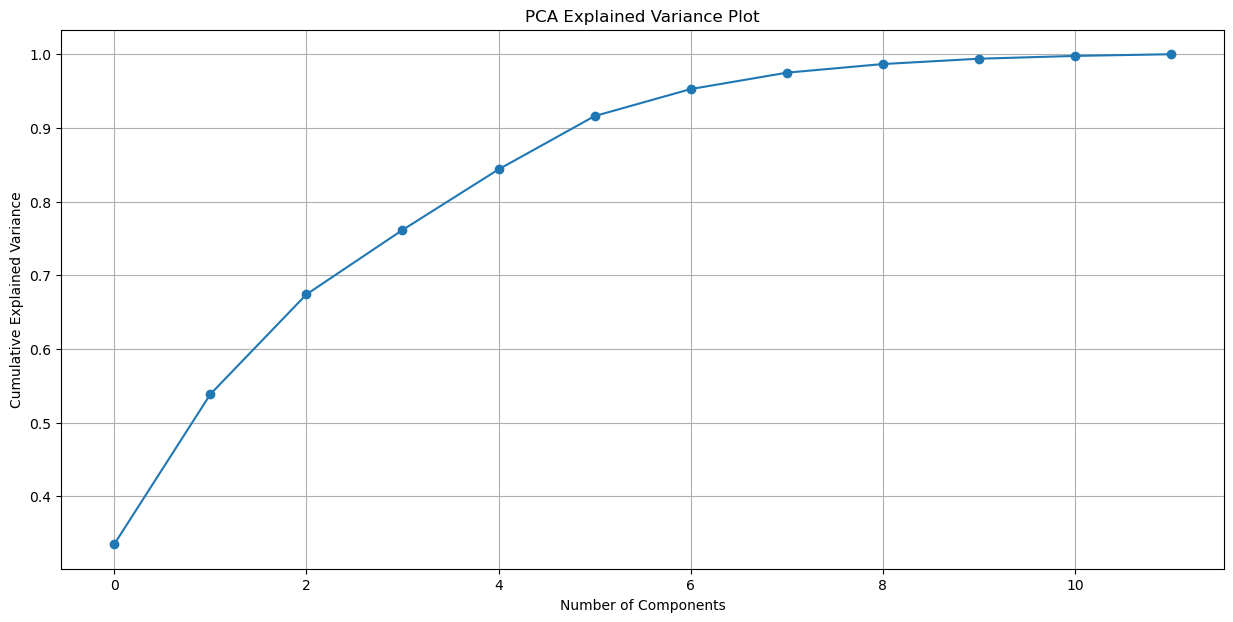

In [26]:
### YOUR CODE HERE

from sklearn.decomposition import PCA

pca = Pipeline([
    ('preprocessing', data_pipeline),
    ('pca', PCA())
])

pca.fit_transform(X_train)

explained_variance_ratio = pca.named_steps['pca'].explained_variance_ratio_

plt.figure(figsize=(15, 7))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Plot')
plt.grid(True)
plt.show()

In [ ]:
#по графику видно, что примерное кол-во компонент - 10. 

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [28]:
### YOUR CODE HERE
pca_pipeline = Pipeline([
    ('preprocessing', data_pipeline),
    ('pca', PCA(n_components=10))
])

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_log

Best hyperparameters: {'log_reg__C': 10}
Accuracy: 0.67003367003367
F1 Score: 0.6595315850560661


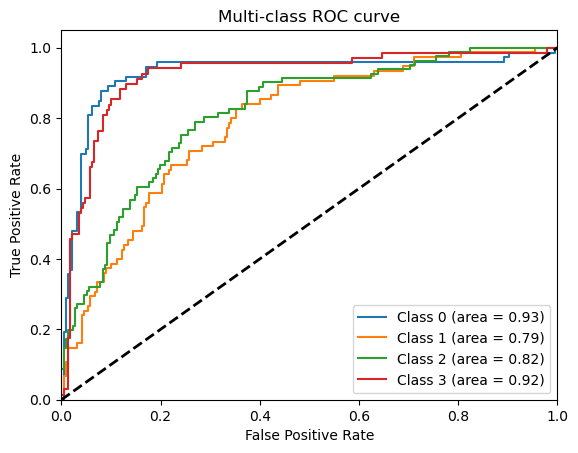

In [29]:
### YOUR CODE HERE

log_reg_pca_pipeline = Pipeline([
    ('preprocessing', pca_pipeline),
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))
])

param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(log_reg_pca_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

log_reg_best_params = grid_search.best_params_

log_reg_pca_pipeline_best = Pipeline([
    ('preprocessing', pca_pipeline),
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=log_reg_best_params['log_reg__C']))
])

y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)

print_metrics(y_test, y_pred)

plot_multiclass_roc(y_test, y_pred_proba)



#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Best hyperparameters: {'dt__max_depth': 8}
Accuracy: 0.5824915824915825
F1 Score: 0.5764427311116549


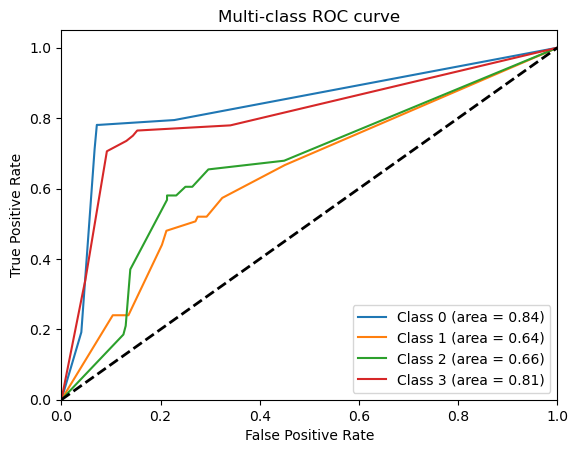

In [30]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
import numpy as np
import random

random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

decision_tree_pipeline = Pipeline([
    ('preprocessing', pca_pipeline),
    ('dt', DecisionTreeClassifier(random_state=random_seed))
])

param_grid = {
    'dt__max_depth': range(1, 15) 
} 

grid_search = GridSearchCV(decision_tree_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

dt_best_params = grid_search.best_params_

decision_tree_pipeline_best = Pipeline([
    ('preprocessing', pca_pipeline),
    ('dt', DecisionTreeClassifier(max_depth=dt_best_params['dt__max_depth'], random_state=random_seed))
])

y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)

print_metrics(y_test, y_pred)

plot_multiclass_roc(y_test, y_pred_proba)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_log

/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_log

/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_log

/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_log

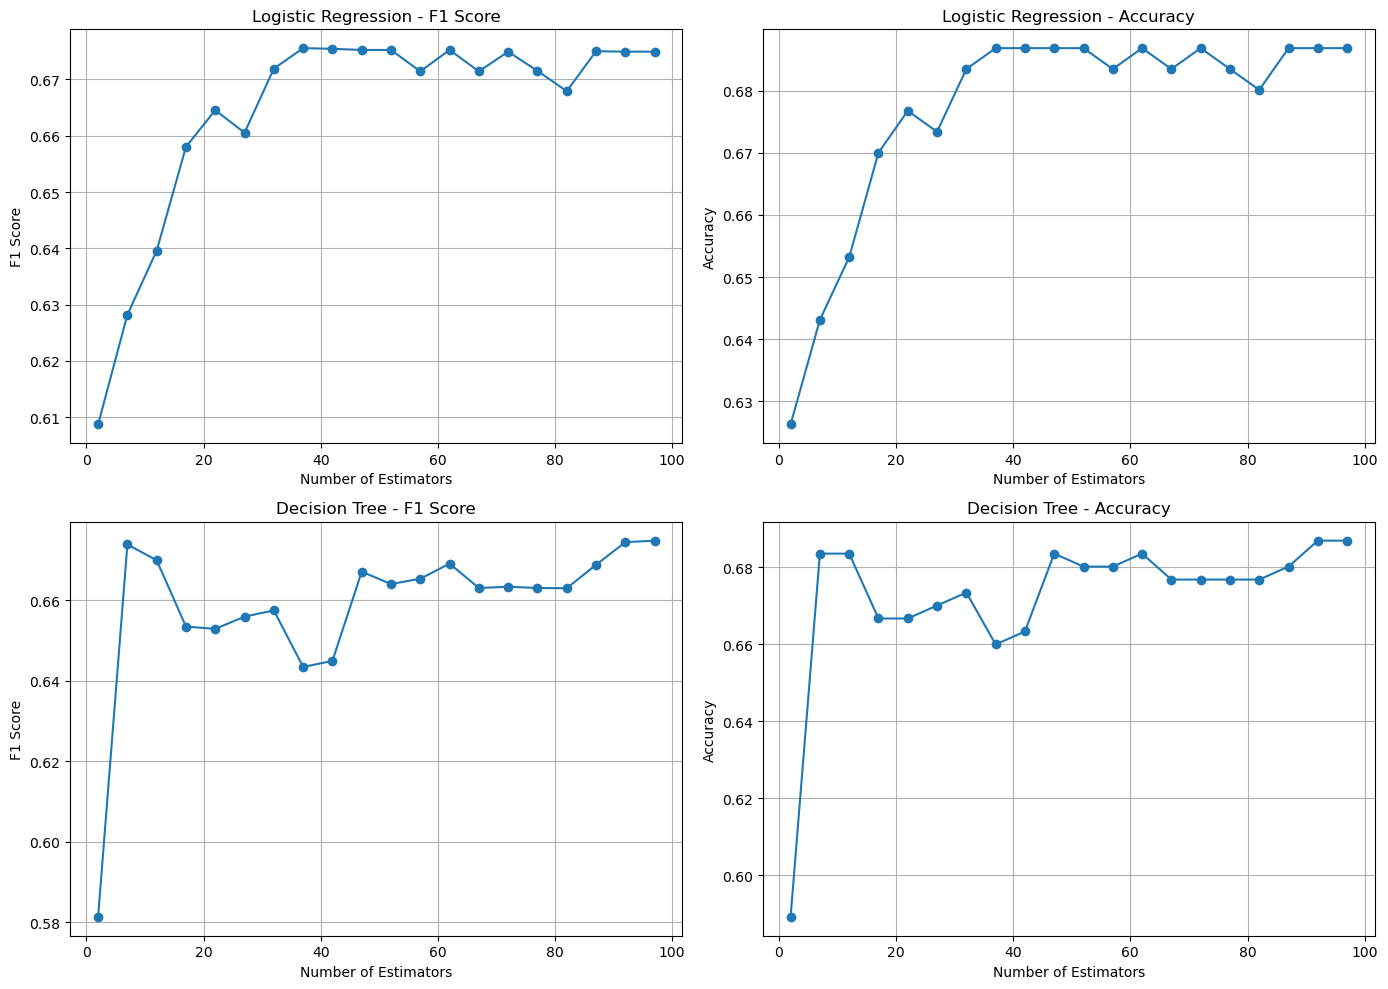

In [31]:


#Bootstrap функция
def bootstrap(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

#генерация
bootstraps = [bootstrap(X_train, y_train) for _ in range(100)]

best_log_reg_params = {'C': log_reg_best_params['log_reg__C']}
best_dt_params = {'max_depth': dt_best_params['dt__max_depth']}

#создание 100 lR моделей
log_reg_models = [Pipeline([
    ('preprocessing', pca_pipeline),
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, **best_log_reg_params, random_state=random_seed))
]) for _ in range(100)]

#создание 100 моделей деревьев решений
dt_models = [Pipeline([
    ('preprocessing', pca_pipeline),
    ('dt', DecisionTreeClassifier(**best_dt_params, random_state=random_seed))
]) for _ in range(100)]

log_reg_ensemble_probabilities = []
dt_ensemble_probabilities = []

#создание прогнозов
for n in range(100):
    X_boot, y_boot = bootstraps[n]
    log_reg_models[n].fit(X_boot, y_boot)
    dt_models[n].fit(X_boot, y_boot)
    log_reg_ensemble_probabilities.append(log_reg_models[n].predict_proba(X_test))
    dt_ensemble_probabilities.append(dt_models[n].predict_proba(X_test))

def average_probabilities(ensemble_probabilities):
    return np.mean(ensemble_probabilities, axis=0)

log_reg_accuracy_scores = []
dt_accuracy_scores = []
log_reg_f1_scores = []
dt_f1_scores = []


for n in range(2, 101, 5):
    log_reg_avg_probs = average_probabilities(log_reg_ensemble_probabilities[:n])
    dt_avg_probs = average_probabilities(dt_ensemble_probabilities[:n])
    
    log_reg_ensemble_pred = np.argmax(log_reg_avg_probs, axis=1)
    dt_ensemble_pred = np.argmax(dt_avg_probs, axis=1)
    
    log_reg_accuracy = accuracy_score(y_test, log_reg_ensemble_pred)
    dt_accuracy = accuracy_score(y_test, dt_ensemble_pred)
    
    f1_log_reg = f1_score(y_test, log_reg_ensemble_pred, average='weighted')
    f1_dt = f1_score(y_test, dt_ensemble_pred, average='weighted')

    log_reg_accuracy_scores.append(log_reg_accuracy)
    dt_accuracy_scores.append(dt_accuracy)
    log_reg_f1_scores.append(f1_log_reg)
    dt_f1_scores.append(f1_dt)

#результаты
ensemble_sizes = list(range(2, 101, 5))

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(ensemble_sizes, log_reg_f1_scores, label='F1 Score', marker='o')
plt.title('Logistic Regression - F1 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(ensemble_sizes, log_reg_accuracy_scores, label='Accuracy', marker='o')
plt.title('Logistic Regression - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(ensemble_sizes, dt_f1_scores, label='F1 Score', marker='o')
plt.title('Decision Tree - F1 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(ensemble_sizes, dt_accuracy_scores, label='Accuracy', marker='o')
plt.title('Decision Tree - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

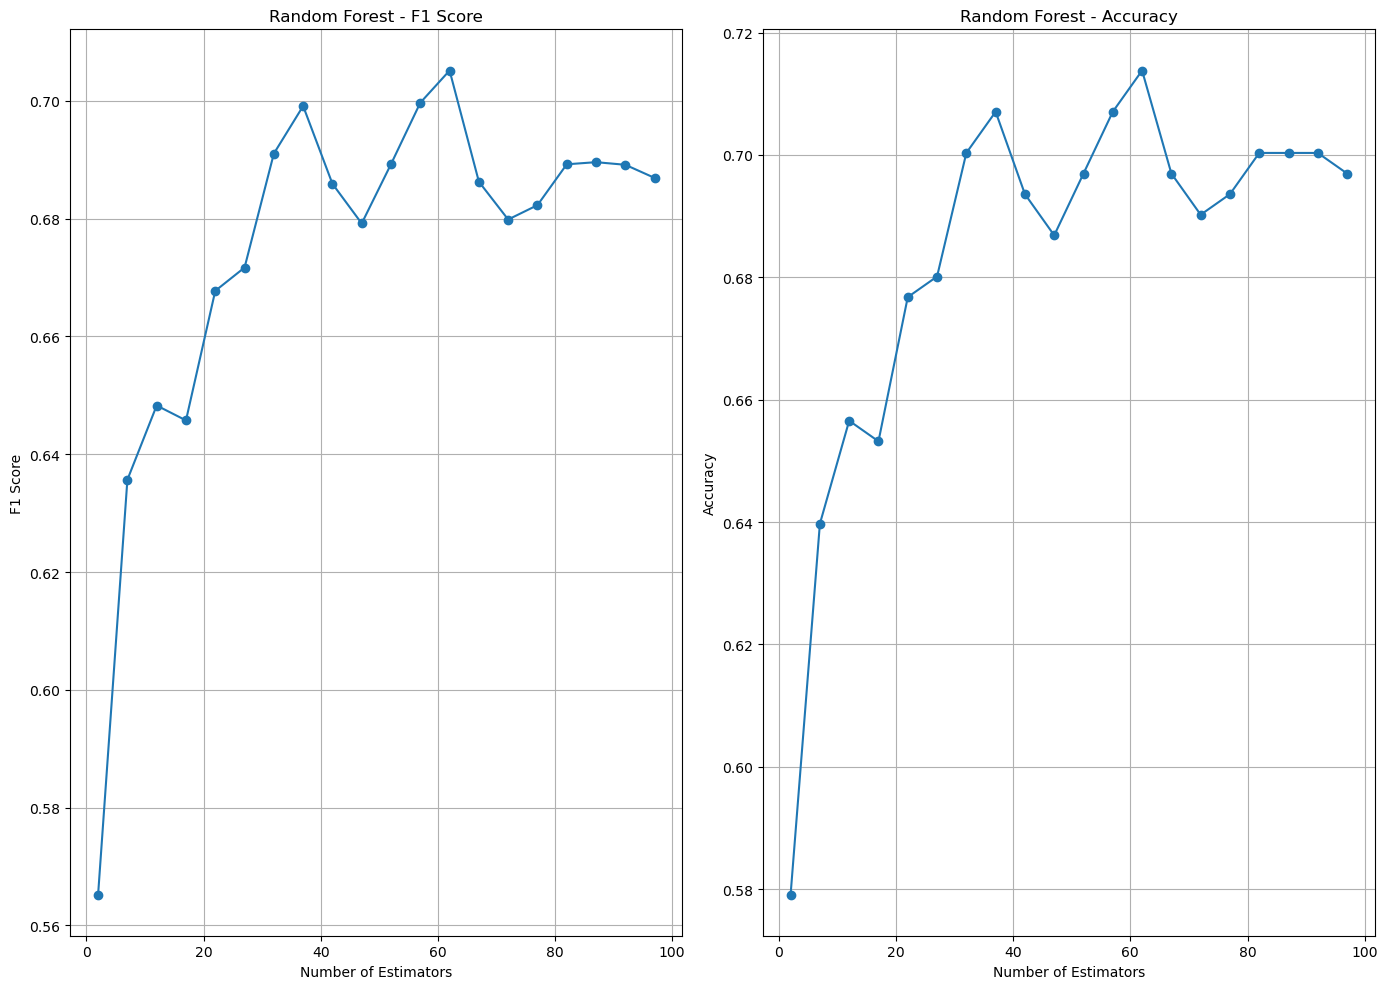

In [32]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

random_forest_pipeline = Pipeline([
    ('preprocessing', pca_pipeline),
    ('rf', RandomForestClassifier())
])

rf_accuracy_scores = []
rf_f1_scores = []

rf_sizes = list(range(2, 101, 5))

for n in rf_sizes:
    random_forest_pipeline = Pipeline([
        ('preprocessing', pca_pipeline),
        ('rf', RandomForestClassifier(n_estimators=n, random_state=random_seed))
    ])
    
    random_forest_pipeline.fit(X_train, y_train)

    y_pred = random_forest_pipeline.predict(X_test)

    rf_accuracy = accuracy_score(y_test, y_pred)
    rf_f1 = f1_score(y_test, y_pred, average='weighted')

    rf_accuracy_scores.append(rf_accuracy)
    rf_f1_scores.append(rf_f1)

best_rf_size = rf_sizes[np.argmax(rf_f1_scores)]

random_forest_pipeline_best = Pipeline([
    ('preprocessing', pca_pipeline),
    ('rf', RandomForestClassifier(n_estimators=best_rf_size, random_state=random_seed))
])

plt.figure(figsize=(14, 10))

plt.subplot(1, 2, 1)
plt.plot(rf_sizes, rf_f1_scores, label='F1 Score', marker='o')
plt.title('Random Forest - F1 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(rf_sizes, rf_accuracy_scores, label='Accuracy', marker='o')
plt.title('Random Forest - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariabarabash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_log

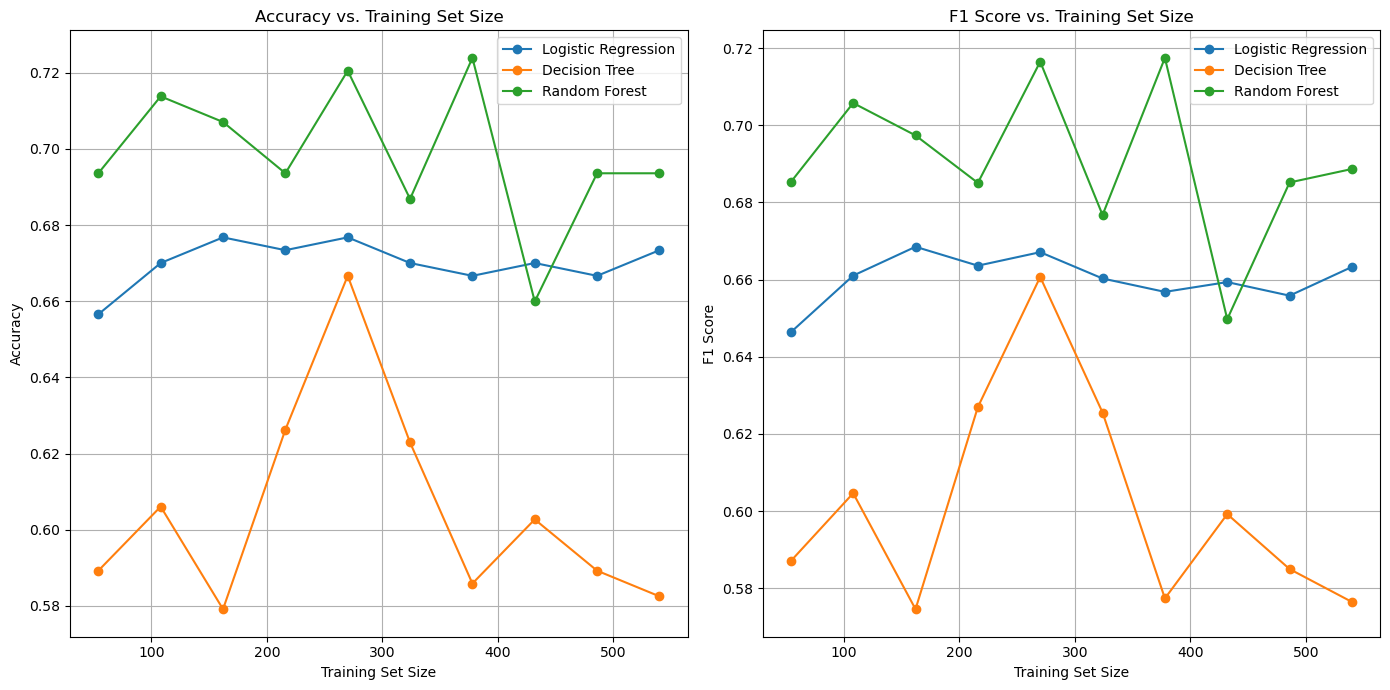

In [33]:
# YOUR CODE HERE
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=10)

models = {'Logistic Regression': log_reg_pca_pipeline_best,
          'Decision Tree': decision_tree_pipeline_best, 
          'Random Forest': random_forest_pipeline_best}

results = {name: {'accuracy': [], 'f1': []} for name in models}

for i in range(1, 11):
    X_train_partial, y_train_partial = np.array([]).reshape(0, X_train.shape[1]), np.array([])
    counter = 0

    # Getting the first i folds
    for train_index, _ in kf.split(X_train):
        counter += 1
        X_train_partial = np.vstack([X_train_partial, X_train[train_index]])
        y_train_partial = np.concatenate([y_train_partial, y_train[train_index]])

        if counter == i:
            break

    for name, model in models.items():
        model.fit(X_train_partial, y_train_partial)
        predictions = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='weighted')
        
        results[name]['accuracy'].append(accuracy)
        results[name]['f1'].append(f1)
        
train_sizes = [(X_train.shape[0] // 10) * i for i in range(1, 11)]

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for name in models:
    plt.plot(train_sizes, results[name]['accuracy'], label=name, marker='o')
plt.title('Accuracy vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for name in models:
    plt.plot(train_sizes, results[name]['f1'], label=name, marker='o')
plt.title('F1 Score vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'xgb__n_estimators': 300}


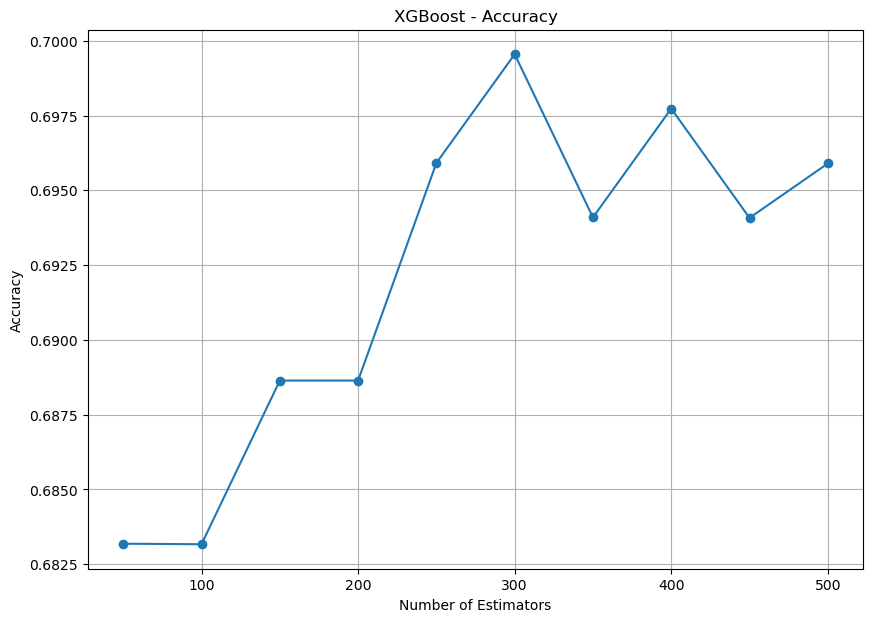

In [34]:
# YOUR CODE HERE

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

num_classes = np.unique(y_train).shape[0]


xgb_pipeline = Pipeline([
    ('preprocessing', pca_pipeline),
    ('xgb', xgb.XGBClassifier(learning_rate=0.1, objective='multi:softprob', num_class=num_classes, random_state=42))
])

param_grid = {
    'xgb__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
}

grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

xgb_best_params = grid_search.best_params_

xgb_accuracy_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 7))

plt.plot(param_grid['xgb__n_estimators'], xgb_accuracy_scores, marker='o')
plt.title('XGBoost - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()